In [1]:
from sklearn.datasets import load_digits
from scipy.spatial import distance
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
digits = load_digits()

In [3]:
df=pd.DataFrame(data=digits.data, columns=digits.feature_names)

In [4]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


# PCA From Scratch

In [5]:
def Covariance_matrix(X):
    n = X.shape[0] 
    X_std = X - np.mean(X.T, axis=1) 
    cov_mat = np.dot(X_std.T, X_std) / (n)
    return cov_mat

In [6]:
cov_matrix=Covariance_matrix(df)

In [7]:
cov_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.82253951,  2.39965886, ..., -0.15980632,
         0.09845941, -0.0740206 ],
       [ 0.        ,  2.39965886, 22.59579234, ..., -1.15479735,
         1.41124994,  0.72947431],
       ...,
       [ 0.        , -0.15980632, -1.15479735, ..., 34.79797313,
        15.63983626,  2.87398245],
       [ 0.        ,  0.09845941,  1.41124994, ..., 15.63983626,
        16.72327062,  4.71815884],
       [ 0.        , -0.0740206 ,  0.72947431, ...,  2.87398245,
         4.71815884,  3.45812736]])

In [8]:
cov_matrix.shape

(64, 64)

In [ ]:
"""
Power Iteration is based on the principle that, for a given matrix A
a repeatedly multiplying a random vector by A
tends to yield a vector that approximates an eigenvector associated with the largest eigenvalue of A

"""

In [9]:
def power_iteration(A, num_iterations):
    n = len(A)
    eigenvectors = []
    eigenvalues = []
    
    for _ in range(n):
        x = np.random.rand(n)
        for _ in range(num_iterations):
            y = np.dot(A, x)
            x = y / np.linalg.norm(y) #numerical stability and avoid overflow or underflow issues
        
        eigenvalue = np.dot(np.dot(A, x), x) 
        eigenvalues.append(eigenvalue)
        eigenvectors.append(x)
    
    return eigenvalues, eigenvectors

In [10]:
def PCA(X,n_components):

    cov_matrix=Covariance_matrix(X)
    eigenvalues,eigenvectors=power_iteration(cov_matrix,100)
    eigenvalues=np.array(eigenvalues)
    eigenvectors=np.array(eigenvectors)
    mean=np.array(np.mean(X.T, axis=1))
    shifted_mean = X - mean
    indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[indices]
    sorted_eigenvectors = eigenvectors[:, indices]

    eigenvectors_subset = sorted_eigenvectors[:, :n_components]

    transformed_data  = np.dot(shifted_mean, eigenvectors_subset)
    
    reconstructed_data=np.dot(transformed_data, eigenvectors_subset.transpose())+mean

    return transformed_data,reconstructed_data

# Different  Q matrix

### num_components= 40

In [11]:
num_components1=40
compressed_data1,reconstructed_data1=PCA(df,num_components1)
print(f"Original data : {df.shape}")
print(f"After applying PCA : {compressed_data1.shape}")
Reconstruction_error1=np.mean(np.square(df - reconstructed_data1),axis=0)

Original data : (1797, 64)
After applying PCA : (1797, 40)


### num_components=30

In [12]:
num_components2=30
compressed_data2,reconstructed_data2=PCA(df,num_components2)
print(f"Original data : {df.shape}")
print(f"After applying PCA : {compressed_data2.shape}")
Reconstruction_error2=np.mean(np.square(df - reconstructed_data2),axis=0)

Original data : (1797, 64)
After applying PCA : (1797, 30)


### num_components=20

In [13]:
num_components3=20
compressed_data3,reconstructed_data3=PCA(df,num_components3)
print(f"Original data: {df.shape}")
print(f"After applying PCA : {compressed_data3.shape}")
Reconstruction_error3=np.mean(np.square(df - reconstructed_data3),axis=0)

Original data: (1797, 64)
After applying PCA : (1797, 20)


### num_components=9

In [14]:
num_components4=9
compressed_data4,reconstructed_data4=PCA(df,num_components4)
print(f"Original data: {df.shape}")
print(f"After applying PCA : {compressed_data4.shape}")
Reconstruction_error4=np.mean(np.square(df - reconstructed_data4),axis=0)

Original data: (1797, 64)
After applying PCA : (1797, 9)


### num_components=3

In [15]:
num_components5=3
compressed_data5,reconstructed_data5=PCA(df,num_components5)
print(f"Original data: {df.shape}")
print(f"After applying PCA : {compressed_data5.shape}")
Reconstruction_error5=np.mean(np.square(df - reconstructed_data5),axis=0)

Original data: (1797, 64)
After applying PCA : (1797, 3)


## Comparsion of the error with different Q matrix

In [15]:
mean1=np.mean(Reconstruction_error1)
mean1

8.570607644618947

In [16]:
mean2=np.mean(Reconstruction_error2)
mean2

10.61793408802367

In [17]:
mean3=np.mean(Reconstruction_error3)
mean3

13.394588103335817

In [18]:
mean4=np.mean(Reconstruction_error4)
mean4

17.03429151093607

In [19]:
mean5=np.mean(Reconstruction_error5)
mean5

18.343456220110717

### Error increase with decreasing the num_components

In [ ]:
"""
With num_compenents=40 , the average reconstruction error is = 8

With num_compenents=30 , the average reconstruction error is = 10

With num_compenents=20 , the average reconstruction error is = 13

With num_compenents=9 , the average reconstruction error is = 17

With num_compenents=3 , the average reconstruction error is = 18


"""

In [ ]:
"""
Significant Dimensionality Reduction: Reducing from 64 to 3 features is a 
drastic reduction in dimensionality. This can be very advantageous in aspects 
like: simplifying the model, reducing computational costs, and enabling 
visualization in 3D space. 


Average Error of 18%: An average error of 18% means that the three 
principal components retain 82% of the variance in the original dataset. This 
is a substantial amount of information being captured, considering the level 
of dimensionality reduction. 



"""

In [ ]:
"""
The best num_components is equal to 3 as we reduced the number of 
features from 64 to 3, and the error is acceptable (=18). 
"""

### DBSCAN ALGORTHIM FROM SCRATCH

In [16]:
class Basic_DBSCAN:

    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric

    def fit_predict(self, X):
        clusters = [0] * X.shape[0]
        self._simple_DBSCAN(X, clusters)
        return clusters

    def _simple_DBSCAN(self, X, clusters): #clusters is zeros at first
        currentPoint = 0
        for i in range(X.shape[0]):
            if clusters[i] != 0:
                continue
            neighbors = self._neighborsGen(X, i)
            if len(neighbors) < self.minPts:
                clusters[i] = -1
            else:
                currentPoint += 1
                self._expand(X, clusters, i, neighbors, currentPoint) #give my neighbors the same cluster of mine
        return clusters

    def _neighborsGen(self, X, point_index):
        neighbors = []
        for i in range(X.shape[0]):
            if self.metric(X[point_index], X[i]) < self.eps:
                neighbors.append(i)  # append the index
        return neighbors

    def _expand(self, X, clusters, point_index, neighbors, current_cluster_label): #when core point is found
        clusters[point_index] = current_cluster_label
        i = 0
        while i < len(neighbors):
            next_point_index = neighbors[i]
            if clusters[next_point_index] == -1:
                clusters[next_point_index] = current_cluster_label
            elif clusters[next_point_index] == 0:
                clusters[next_point_index] = current_cluster_label
                new_neighbors = self._neighborsGen(X, next_point_index)
                if len(new_neighbors) >= self.minPts: #if it is core point take it with its neighbors if not take the point only
                    neighbors = neighbors + new_neighbors
            i += 1

#### To check the performance of our DBSCAN comparing to the built in one

In [37]:
def checkEqual(cluster1, cluster2):
    return cluster1 == cluster2

In [38]:
df = StandardScaler().fit_transform(df)

In [39]:
db = Basic_DBSCAN(eps=5.0, minPts=10)
clusters = db.fit_predict(df)

In [40]:
#Noise
clusters.count(-1)

301

In [41]:
clusters.count(1)

1315

In [42]:
clusters.count(2)

141

In [43]:
clusters.count(3)

14

In [44]:
clusters.count(4)

9

#### Comparing our clustring by the built-in

In [45]:
sk_clusters = DBSCAN(eps=5.0, min_samples=10, metric=distance.euclidean).fit(df).labels_
sk_clusters = [x+1 if x != -1 else x for x in sk_clusters]

In [46]:
sk_clusters.count(-1)

301

In [48]:
sk_clusters.count(1)

1315

In [49]:
sk_clusters.count(2)

141

In [50]:
sk_clusters.count(3)

14

In [51]:
sk_clusters.count(4)

9

In [52]:
ari = adjusted_rand_score(clusters, sk_clusters)

In [53]:
ari

1.0

In [131]:
print(f'Same Results: {checkEqual(clusters, sk_clusters)}')

Same Results: True


In [132]:
db1 = Basic_DBSCAN(eps=5.0, minPts=10)
clusters1 = db1.fit_predict(df)

In [133]:
sk_clusters1 = DBSCAN(eps=1, min_samples=30, metric=distance.euclidean).fit(df).labels_
sk_clusters1 = [x+1 if x != -1 else x for x in sk_clusters1]

In [134]:
print(f'Same Results: {checkEqual(clusters1, sk_clusters1)}')

Same Results: False


## DBSCAN with PCA with num_components=3

In [136]:
compressed_data5.shape

(1797, 3)

In [137]:
df_PCA = StandardScaler().fit_transform(compressed_data5)

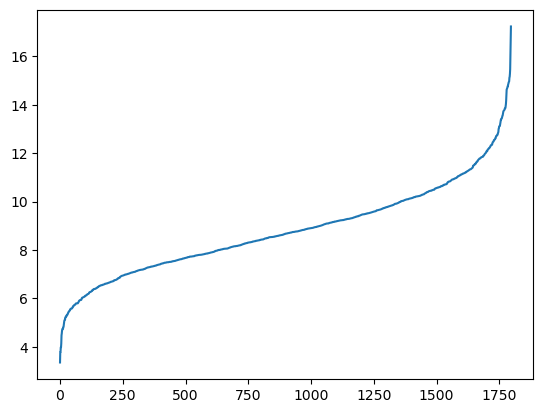

In [152]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(compressed_data3)
distances, indices = neighbors_fit.kneighbors()

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [138]:
db_PCA = Basic_DBSCAN(eps=14, minPts=20) 
clusters_PCA = db_PCA.fit_predict(compressed_data5)

In [139]:
clusters_PCA.count(-1)

0

In [141]:
sk_clusters_PCA = DBSCAN(eps=14, min_samples=20, metric=distance.euclidean).fit(compressed_data5).labels_
sk_clusters_PCA = [x+1 if x != -1 else x for x in sk_clusters_PCA]

In [142]:
sk_clusters_PCA.count(-1)

0

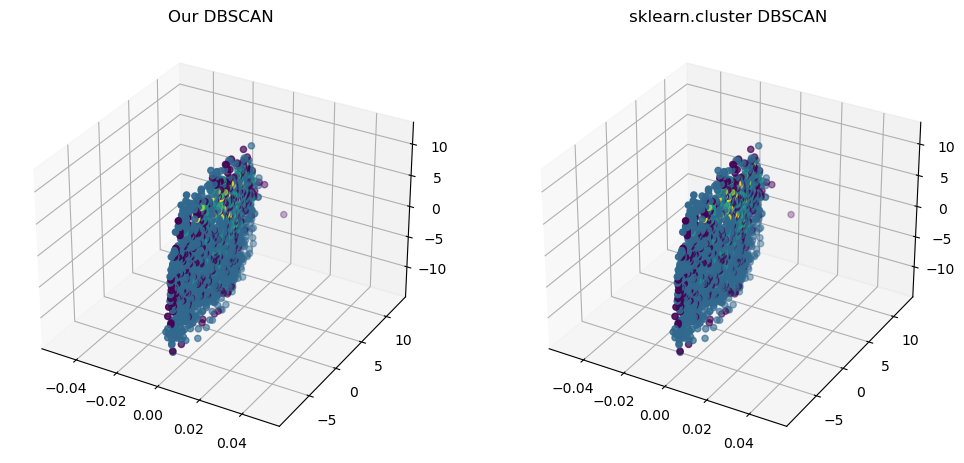

In [150]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(compressed_data5[:, 0], compressed_data5[:, 1], compressed_data5[:, 2], c=clusters, cmap='viridis')
ax1.set_title('Our DBSCAN')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(compressed_data5[:, 0], compressed_data5[:, 1], compressed_data5[:, 2], c=sk_clusters, cmap='viridis')
ax2.set_title('sklearn.cluster DBSCAN')

plt.show()

##### Comparsion of DBscan without PCA and with PCA

In [ ]:
"""
#Without PCA
1-Computational Complexity: The computational complexity increases with the number of dimensions.
DBSCAN's performance can degrade in high-dimensional spaces, 
both in terms of speed and memory usage.


2-Noise Sensitivity: In its original form, 
DBSCAN is sensitive to noise, 
and high-dimensional data often contains more noise and sparsity, 
potentially leading to many points being labeled as noise.
As the resulted noise is = 301


#With PCA
1- Improved Performance: Lower dimensions can significantly improve the computational efficiency of DBSCAN,
both in terms of speed and memory requirements.

2- Noise Reduction: PCA can help in filtering out noise and irrelevant features,
as it focuses on the directions with the most variance.
As the resulted noise is = 0 which is less than before the PCA



"""